# Capstone Project - The Battle of Neighborhoods

# INTRODUCTION

Chennai is the capital of Indian state of Tamil Nadu. It is a part of the city of Delhi’s 11 districts. 
It is one of the largest cultural, economic and educational centers of south India. 
According to the 2011 Indian census, it is the sixth-most populous city and fourth-most populous urban agglomeration in India. 
The city together with the adjoining regions constitutes the Chennai Metropolitan Area, which is the 36th-largest urban area by population in the world.
The Chennai Metropolitan Area is one of the largest municipal economies of India.
More than one-third of India's automobile industry being based in the city.
Home to the Tamil film industry, Chennai is also known as a major film production center. 
Chennai is one of the 100 Indian cities to be developed as a smart city under the Smart Cities Mission. 
Tamils form the majority of Chennai's population. 
English is spoken largely by white-collar workers,[204] often mixed into Tamil. 
Chennai, along with Bengaluru, Mumbai and Delhi, is one of the few Indian cities that are home to a diverse population of ethno-religious communities. 
Due to its diverse culture there lots of varieties in food items. 
National Geographic mentioned Chennai as the only South Asian city to feature in its 2015 "Top 10 food cities" list. 
There are many restaurants in Chennai city out of which each belonging to different categories like South Indian , North Indian , Chinese , Italian , European , Pan Asian , Japanese , Mediterranean etc.


In [1]:
import pandas as pd
import numpy as np
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
! pip install geocoder
import geocoder

usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab


In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/linadinesh29/Course5_The-Battle-of-Neighborhoods/main/zomato.csv',encoding='ISO-8859-1')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [6]:
df_india = df[df['Country Code'] == 1]
df_NDLS = df_india[df_india['City'] == 'Chennai']
df_NDLS.reset_index(drop=True, inplace=True)
df_NDLS.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,69024,That Madras Place,1,Chennai,"34/29, 2nd Main Road, Kasturibai Nagar, Adyar,...",Adyar,"Adyar, Chennai",80.250744,13.005801,"European, Italian, Desserts",...,Indian Rupees(Rs.),Yes,Yes,No,No,2,4.2,Green,Very Good,1810
1,72475,Haunted,1,Chennai,"273, F13, New Number 71, 2nd Main Road, Anna N...",Anna Nagar East,"Anna Nagar East, Chennai",80.220672,13.086438,"North Indian, Chinese, Arabian",...,Indian Rupees(Rs.),Yes,Yes,No,No,2,3.8,Yellow,Good,519
2,70431,Pantry d'or,1,Chennai,"21/11, J Block, 6th Avenue Main Road, Anna Nag...",Anna Nagar East,"Anna Nagar East, Chennai",80.219104,13.091809,"Continental, Cafe, Italian, Desserts",...,Indian Rupees(Rs.),Yes,Yes,No,No,2,4.4,Green,Very Good,1504
3,71443,Palmshore,1,Chennai,"95, Jawaharlal Nehru Salai, Jafferkhanpet, Ash...",Ashok Nagar,"Ashok Nagar, Chennai",80.208812,13.029780,"North Indian, Mughlai, Chinese, South Indian",...,Indian Rupees(Rs.),Yes,Yes,No,No,2,4.2,Green,Very Good,841
4,73088,Chili's,1,Chennai,"49 & 50 L, Express Avenue Mall, White's Road, ...","Express Avenue Mall, Royapettah","Express Avenue Mall, Royapettah, Chennai",80.264151,13.058616,"Mexican, American, Tex-Mex, Burger",...,Indian Rupees(Rs.),Yes,Yes,No,No,3,4.8,Dark Green,Excellent,1262


Data Cleaning
remove the unwanted columns and rows from dataset

In [7]:
df_Res= df_NDLS[df_NDLS.Longitude !=0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]

In [8]:

df_Res = df_Res[df_Res['Aggregate rating'] !=0.0]

In [9]:
df_Res.head()

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Aggregate rating,Rating text,Votes
0,That Madras Place,Adyar,80.250744,13.005801,"European, Italian, Desserts",4.2,Very Good,1810
1,Haunted,Anna Nagar East,80.220672,13.086438,"North Indian, Chinese, Arabian",3.8,Good,519
2,Pantry d'or,Anna Nagar East,80.219104,13.091809,"Continental, Cafe, Italian, Desserts",4.4,Very Good,1504
3,Palmshore,Ashok Nagar,80.208812,13.029780,"North Indian, Mughlai, Chinese, South Indian",4.2,Very Good,841
4,Chili's,"Express Avenue Mall, Royapettah",80.264151,13.058616,"Mexican, American, Tex-Mex, Burger",4.8,Excellent,1262


created map to show the restaurant cluters

In [11]:
Chennai_Rest = folium.Map(location=[28.52, 77.25], zoom_start=12)

X = df_Res['Latitude']
Y = df_Res['Longitude']
Z = np.stack((X, Y), axis=1)

kmeans = KMeans(n_clusters=5, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
df_Res ['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(df_Res['Latitude'], df_Res['Longitude'], df_Res['Locality'], df_Res['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(Chennai_Rest)  

Chennai_Rest

In [12]:

df_Res.head()

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Aggregate rating,Rating text,Votes,Cluster
0,That Madras Place,Adyar,80.250744,13.005801,"European, Italian, Desserts",4.2,Very Good,1810,3
1,Haunted,Anna Nagar East,80.220672,13.086438,"North Indian, Chinese, Arabian",3.8,Good,519,4
2,Pantry d'or,Anna Nagar East,80.219104,13.091809,"Continental, Cafe, Italian, Desserts",4.4,Very Good,1504,4
3,Palmshore,Ashok Nagar,80.208812,13.029780,"North Indian, Mughlai, Chinese, South Indian",4.2,Very Good,841,2
4,Chili's,"Express Avenue Mall, Royapettah",80.264151,13.058616,"Mexican, American, Tex-Mex, Burger",4.8,Excellent,1262,1


Which places have the best restaurant in Chennai?

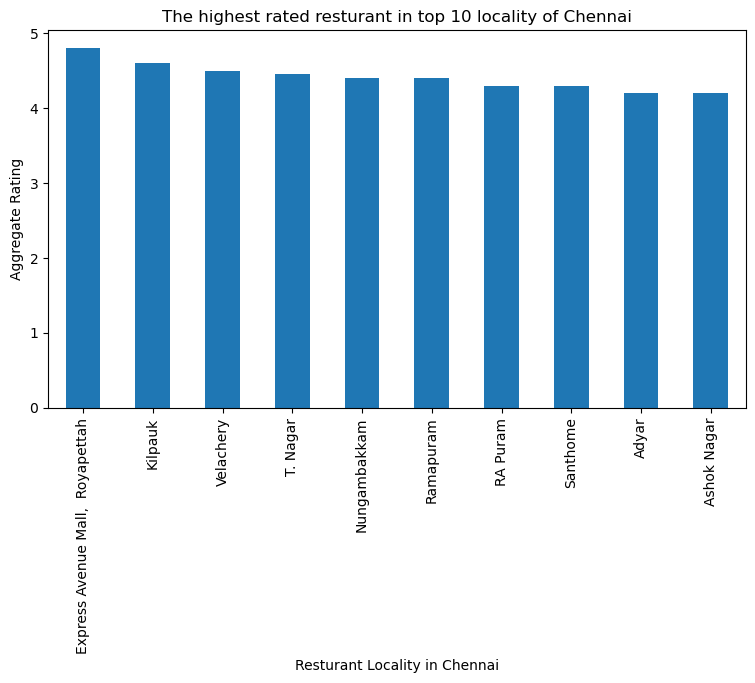

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest rated resturant in top 10 locality of Chennai')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Chennai')
#On y-axis
plt.ylabel('Aggregate Rating')
#displays the plot
plt.show()

The best restaurants are available in Express Avenue Mall, Royapettah.

what places are have average restaurants in Chennai?

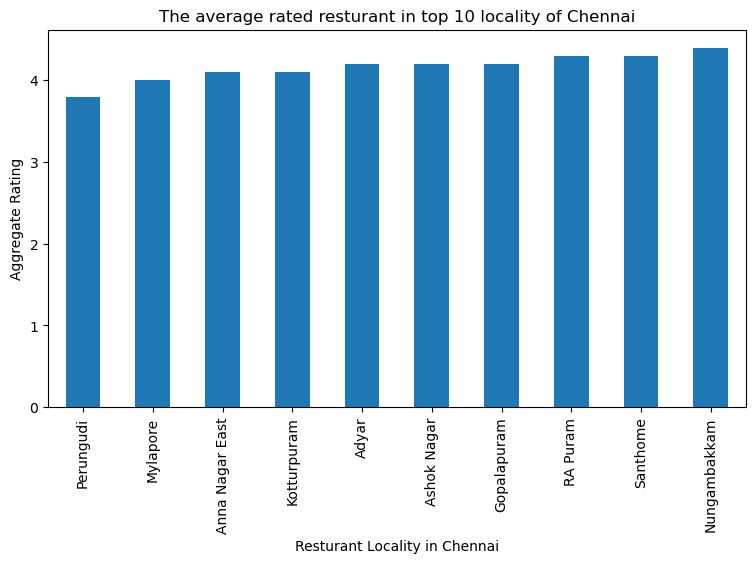

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The average rated resturant in top 10 locality of Chennai')
#On x-axis

#giving a bar plot

df_Res.groupby('Locality')['Aggregate rating'].mean().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Chennai')
#On y-axis
plt.ylabel('Aggregate Rating')

#displays the plot
plt.show()

The average restaurants are available in Perungudi.

Which place are suitable for edible person in Chennai city?

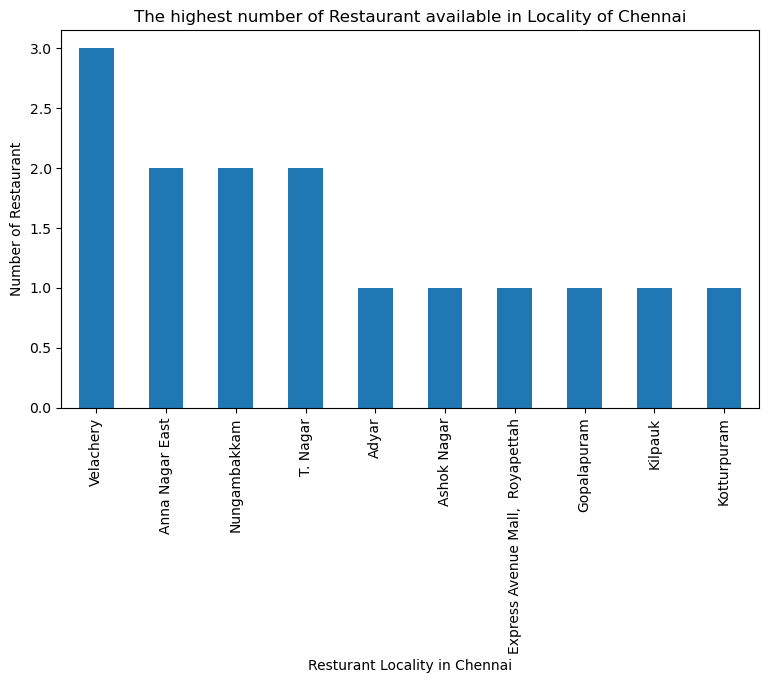

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest number of Restaurant available in Locality of Chennai')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Chennai')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

Velachery is the best places for edible person to stay there.

Which place are not suitable for edible person in Chennai city?

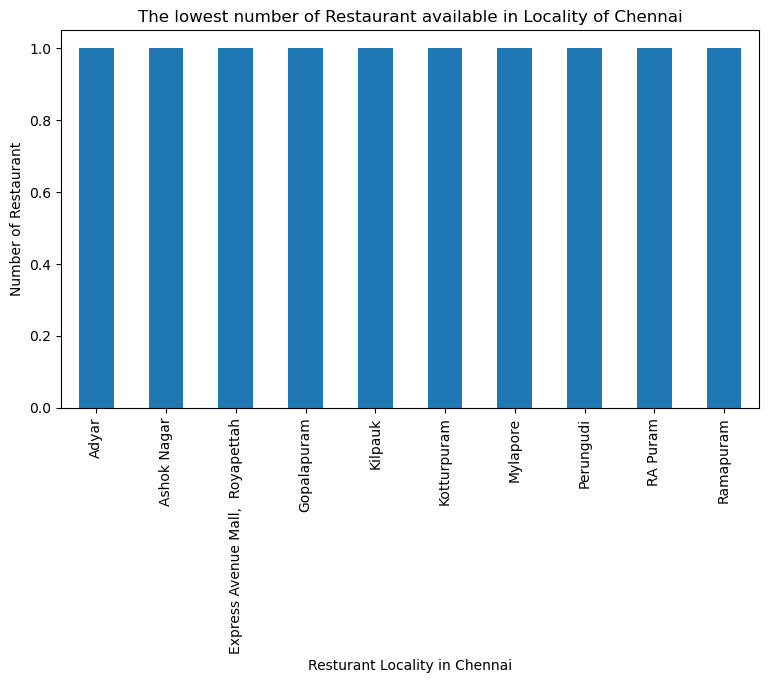

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The lowest number of Restaurant available in Locality of Chennai')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Chennai')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

Data transformation

Based on Locality grouping the data

In [27]:
df_Res_Loc =  df_Res.groupby('Locality').count()['Restaurant Name'].to_frame()
df_Res_rating= df_Res.groupby('Locality')['Aggregate rating'].mean().to_frame()
d_Cuisines = df_Res.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
d_R = df_Res.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
d_V = df_Res.groupby(['Locality'])['Votes'].sum().to_frame()
d_Lat = df_Res.groupby('Locality').mean()['Latitude'].to_frame()
d_Lng = df_Res.groupby('Locality').mean()['Longitude'].to_frame()
df_final = pd.merge(d_Lat,d_Lng,on='Locality').merge(df_Res_Loc, on='Locality').merge(d_Cuisines, on='Locality').merge(df_Res_rating,on ='Locality').merge(d_R, on ='Locality').merge(d_V, on ='Locality')

In [28]:
df_final = df_final[df_final['Aggregate rating'] != 0.000000]
df_final.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','Comments' ,'No_of_Votes']
df_final.head()

,Locality,Lat,Lng,No_of_Restaurant,Cusines,Agg_Rating,Comments,No_of_Votes
0,Adyar,13.005801,80.250744,1,"European, Italian, Desserts",4.2,Very Good,1810
1,Anna Nagar East,13.089124,80.219888,2,"North Indian, Chinese, Arabian, Continental, C...",4.1,"Good, Very Good",2023
2,Ashok Nagar,13.029780,80.208812,1,"North Indian, Mughlai, Chinese, South Indian",4.2,Very Good,841
3,"Express Avenue Mall, Royapettah",13.058616,80.264151,1,"Mexican, American, Tex-Mex, Burger",4.8,Excellent,1262
4,Gopalapuram,13.054347,80.257221,1,"Cafe, European",4.2,Very Good,191


In [29]:

df_final.shape

(15, 8)

Define Foursquare Credentials and Version

In [30]:
## Define Foursquare Credentials and Version
CLIENT_ID = 'ES3ZXR1ALGY0Q0YQVMG0RUMAO00WTUNG4K1C2JN5C2J0O1AZ' # Foursquare ID
CLIENT_SECRET = 'H3VNVPRCUTEX4NP23B4ANBLXWZKKIZ0VM4NKN0IQRYPYXPTW' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ES3ZXR1ALGY0Q0YQVMG0RUMAO00WTUNG4K1C2JN5C2J0O1AZ
CLIENT_SECRET:H3VNVPRCUTEX4NP23B4ANBLXWZKKIZ0VM4NKN0IQRYPYXPTW


create a function to repeat the same process to all the Locality in Chennai

In [31]:
## create a function to repeat the same process to all the Locality in New Delhi

def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

find the venues in all Chennai Locality

In [34]:
# find the venues in all Chennai Locality
Chennai_venues = getNearbyVenues(names=df_final['Locality'],
                                   latitudes=df_final['Lat'],
                                   longitudes=df_final['Lng']
                                  )

Adyar
Anna Nagar East
Ashok Nagar
Express Avenue Mall,  Royapettah
Gopalapuram
Kilpauk
Kotturpuram
Mylapore
Nungambakkam
Perungudi
RA Puram
Ramapuram
Santhome
T. Nagar
Velachery


In [35]:
Chennai_venues.head()

,Locality,Locality Latitude,Locality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Adyar,13.005801,80.250744,That Madras Place,13.005848,80.250726,Café
1,Adyar,13.005801,80.250744,ibaco,13.005864,80.251764,Ice Cream Shop
2,Adyar,13.005801,80.250744,Anjappar,13.006757,80.250713,Indian Restaurant
3,Adyar,13.005801,80.250744,Prems Graama Bhojanam,13.006345,80.253995,Vegetarian / Vegan Restaurant
4,Adyar,13.005801,80.250744,Odyssey Book Shop,13.006682,80.253469,Bookstore


In [36]:
Chennai_venues.groupby('Locality').count()

,Locality Latitude,Locality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Locality,,,,,,
Adyar,25,25,25,25,25,25
Anna Nagar East,19,19,19,19,19,19
Ashok Nagar,8,8,8,8,8,8
"Express Avenue Mall, Royapettah",46,46,46,46,46,46
Gopalapuram,23,23,23,23,23,23
Kilpauk,11,11,11,11,11,11
Kotturpuram,7,7,7,7,7,7
Mylapore,33,33,33,33,33,33
Nungambakkam,25,25,25,25,25,25


In [37]:
print('There are {} uniques categories.'.format(len(Chennai_venues['Venue Category'].unique())))

There are 73 uniques categories.


In [39]:
## Analyze Each Locality

# one hot encoding
Chennai_onehot = pd.get_dummies(Chennai_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
Chennai_onehot['Locality'] = Chennai_venues['Locality'] 

# move Locality column to the first column
column_list = Chennai_onehot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
Chennai_onehot = Chennai_onehot[column_list]

Chennai_onehot.head()

,Locality,American Restaurant,Andhra Restaurant,Arcade,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bank,Bar,...,Shoe Store,Shopping Mall,South Indian Restaurant,Steakhouse,Tea Room,Theater,Toy / Game Store,Vegetarian / Vegan Restaurant,Video Game Store,Women's Store
0,Adyar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Adyar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Adyar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Adyar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Adyar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
Chennai_grouped = Chennai_onehot.groupby('Locality').mean().reset_index()
Chennai_grouped

,Locality,American Restaurant,Andhra Restaurant,Arcade,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bank,Bar,...,Shoe Store,Shopping Mall,South Indian Restaurant,Steakhouse,Tea Room,Theater,Toy / Game Store,Vegetarian / Vegan Restaurant,Video Game Store,Women's Store
0,Adyar,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.040000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.040000,0.000000,0.04
1,Anna Nagar East,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.052632,0.000000,0.00
2,Ashok Nagar,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.125000,0.000000,0.00
3,"Express Avenue Mall, Royapettah",0.021739,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021739,...,0.000000,0.043478,0.000000,0.021739,0.000000,0.00,0.021739,0.000000,0.021739,0.00
4,Gopalapuram,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.086957,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.043478,0.00,0.000000,0.043478,0.000000,0.00
5,Kilpauk,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.090909,0.000000,0.090909,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00
6,Kotturpuram,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00
7,Mylapore,0.000000,0.000000,0.000000,0.030303,0.000000,0.000000,0.000000,0.000000,0.030303,...,0.030303,0.000000,0.030303,0.000000,0.000000,0.00,0.000000,0.030303,0.000000,0.00
8,Nungambakkam,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.04,0.000000,0.000000,0.000000,0.00
9,Perungudi,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.125000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00


In [42]:

Chennai_grouped.shape

(15, 74)

In [43]:
## print each Locality along with the top 5 most common venues

num_top_venues = 5

for hood in Chennai_grouped['Locality']:
    print("----"+hood+"----")
    temp = Chennai_grouped[Chennai_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adyar----
               venue  freq
0  Indian Restaurant  0.20
1       Dessert Shop  0.08
2               Café  0.08
3      Women's Store  0.04
4    Motorcycle Shop  0.04


----Anna Nagar East----
               venue  freq
0  Indian Restaurant  0.16
1     Ice Cream Shop  0.11
2               Café  0.11
3        Pizza Place  0.05
4          Gift Shop  0.05


----Ashok Nagar----
                            venue  freq
0            Fast Food Restaurant  0.25
1               Indian Restaurant  0.25
2                   Movie Theater  0.25
3   Vegetarian / Vegan Restaurant  0.12
4  Multicuisine Indian Restaurant  0.12


----Express Avenue Mall,  Royapettah----
                       venue  freq
0             Clothing Store  0.11
1       Fast Food Restaurant  0.07
2                  Juice Bar  0.07
3          Indian Restaurant  0.07
4  Middle Eastern Restaurant  0.04


----Gopalapuram----
               venue  freq
0          Multiplex  0.22
1  Indian Restaurant  0.13
2               Ca

In [44]:

## put that into a pandas dataframe
## First, write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [46]:
## create the new dataframe and display the top 10 venues for each Locality.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = Chennai_grouped['Locality']

for ind in np.arange(Chennai_grouped.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Chennai_grouped.iloc[ind, :], num_top_venues)

Locality_venues_sorted

,Locality,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adyar,Indian Restaurant,Dessert Shop,Café,Women's Store,Motorcycle Shop,Pizza Place,Department Store,North Indian Restaurant,Comfort Food Restaurant,Coffee Shop
1,Anna Nagar East,Indian Restaurant,Ice Cream Shop,Café,Pizza Place,Gift Shop,Department Store,Park,Fast Food Restaurant,Chinese Restaurant,Restaurant
2,Ashok Nagar,Fast Food Restaurant,Indian Restaurant,Movie Theater,Vegetarian / Vegan Restaurant,Multicuisine Indian Restaurant,American Restaurant,Music Venue,Multiplex,Motorcycle Shop,Middle Eastern Restaurant
3,"Express Avenue Mall, Royapettah",Clothing Store,Fast Food Restaurant,Juice Bar,Indian Restaurant,Middle Eastern Restaurant,Movie Theater,Hotel,Multiplex,Pizza Place,Shopping Mall
4,Gopalapuram,Multiplex,Indian Restaurant,Café,Movie Theater,Bakery,Middle Eastern Restaurant,Vegetarian / Vegan Restaurant,Juice Bar,Tea Room,Clothing Store
5,Kilpauk,Indian Restaurant,Fast Food Restaurant,Italian Restaurant,Shoe Store,Hotel,Pizza Place,South Indian Restaurant,Multicuisine Indian Restaurant,Movie Theater,Motorcycle Shop
6,Kotturpuram,Park,Bakery,Department Store,Café,Flower Shop,Convenience Store,Grocery Store,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant
7,Mylapore,Indian Restaurant,Hotel,Concert Hall,Ice Cream Shop,Pizza Place,Café,Electronics Store,Dessert Shop,Department Store,Lounge
8,Nungambakkam,Indian Restaurant,Chinese Restaurant,Halal Restaurant,Café,Hotel,Multicuisine Indian Restaurant,Fast Food Restaurant,Electronics Store,Department Store,Convenience Store
9,Perungudi,Boutique,Indian Restaurant,South Indian Restaurant,Clothing Store,Donut Shop,Sandwich Place,Middle Eastern Restaurant,Mediterranean Restaurant,Lounge,Mexican Restaurant


In [47]:
## Cluster Locality
## Run k-means to cluster the Locality into 5 clusters.

# set number of clusters
kclusters = 5

Chennai_clustering = Chennai_grouped.drop('Locality', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Chennai_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_.shape

(15,)

In [48]:
# add clustering labels
Chennai_merged = df_final.head(240)
Chennai_merged['Cluster Labels'] = kmeans.labels_

# merge New_Delhi_grouped with df_Chinese to add latitude/longitude for each Locality
Chennai_merged = Chennai_merged.join(Locality_venues_sorted.set_index('Locality'), on='Locality')

Chennai_merged.head()

<ipython-input-48-dc5b2610ecec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Chennai_merged['Cluster Labels'] = kmeans.labels_


,Locality,Lat,Lng,No_of_Restaurant,Cusines,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adyar,13.005801,80.250744,1,"European, Italian, Desserts",4.2,Very Good,1810,4,Indian Restaurant,Dessert Shop,Café,Women's Store,Motorcycle Shop,Pizza Place,Department Store,North Indian Restaurant,Comfort Food Restaurant,Coffee Shop
1,Anna Nagar East,13.089124,80.219888,2,"North Indian, Chinese, Arabian, Continental, C...",4.1,"Good, Very Good",2023,4,Indian Restaurant,Ice Cream Shop,Café,Pizza Place,Gift Shop,Department Store,Park,Fast Food Restaurant,Chinese Restaurant,Restaurant
2,Ashok Nagar,13.029780,80.208812,1,"North Indian, Mughlai, Chinese, South Indian",4.2,Very Good,841,1,Fast Food Restaurant,Indian Restaurant,Movie Theater,Vegetarian / Vegan Restaurant,Multicuisine Indian Restaurant,American Restaurant,Music Venue,Multiplex,Motorcycle Shop,Middle Eastern Restaurant
3,"Express Avenue Mall, Royapettah",13.058616,80.264151,1,"Mexican, American, Tex-Mex, Burger",4.8,Excellent,1262,2,Clothing Store,Fast Food Restaurant,Juice Bar,Indian Restaurant,Middle Eastern Restaurant,Movie Theater,Hotel,Multiplex,Pizza Place,Shopping Mall
4,Gopalapuram,13.054347,80.257221,1,"Cafe, European",4.2,Very Good,191,0,Multiplex,Indian Restaurant,Café,Movie Theater,Bakery,Middle Eastern Restaurant,Vegetarian / Vegan Restaurant,Juice Bar,Tea Room,Clothing Store


In [49]:
# create final map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Chennai_merged['Lat'], Chennai_merged['Lng'], Chennai_merged['Locality'], Chennai_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [50]:
## Examine Clusters

## Cluster 1
Chennai_merged.loc[Chennai_merged['Cluster Labels'] == 0, Chennai_merged.columns[[1] + list(range(5, Chennai_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,13.054347,4.2,Very Good,191,0,Multiplex,Indian Restaurant,Café,Movie Theater,Bakery,Middle Eastern Restaurant,Vegetarian / Vegan Restaurant,Juice Bar,Tea Room,Clothing Store
6,13.022394,4.1,Very Good,1004,0,Park,Bakery,Department Store,Café,Flower Shop,Convenience Store,Grocery Store,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant
11,13.026279,4.4,Very Good,645,0,Asian Restaurant,Italian Restaurant,Indian Restaurant,Café,Convenience Store,Vegetarian / Vegan Restaurant,Bakery,Andhra Restaurant,Chinese Restaurant,Restaurant


In [51]:

## Examine Clusters

## Cluster 2
Chennai_merged.loc[Chennai_merged['Cluster Labels'] == 1, Chennai_merged.columns[[1] + list(range(5, Chennai_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,13.029780,4.2,Very Good,841,1,Fast Food Restaurant,Indian Restaurant,Movie Theater,Vegetarian / Vegan Restaurant,Multicuisine Indian Restaurant,American Restaurant,Music Venue,Multiplex,Motorcycle Shop,Middle Eastern Restaurant
5,13.081878,4.6,Excellent,1510,1,Indian Restaurant,Fast Food Restaurant,Italian Restaurant,Shoe Store,Hotel,Pizza Place,South Indian Restaurant,Multicuisine Indian Restaurant,Movie Theater,Motorcycle Shop


In [52]:
## Examine Clusters

## Cluster 3
Chennai_merged.loc[Chennai_merged['Cluster Labels'] == 2, Chennai_merged.columns[[1] + list(range(5, Chennai_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,13.058616,4.80,Excellent,1262,2,Clothing Store,Fast Food Restaurant,Juice Bar,Indian Restaurant,Middle Eastern Restaurant,Movie Theater,Hotel,Multiplex,Pizza Place,Shopping Mall
10,13.027018,4.30,Very Good,1607,2,Dessert Shop,Chinese Restaurant,Restaurant,Bar,Organic Grocery,Pub,Camera Store,Nightclub,Italian Restaurant,Hotel
12,13.026286,4.30,Very Good,742,2,Vegetarian / Vegan Restaurant,BBQ Joint,Kebab Restaurant,Bar,Restaurant,Café,Middle Eastern Restaurant,Fast Food Restaurant,American Restaurant,Movie Theater
13,13.047562,4.45,"Excellent, Very Good",5058,2,Hotel,BBQ Joint,Restaurant,Coffee Shop,Electronics Store,Boutique,Chinese Restaurant,Salon / Barbershop,Café,Sandwich Place


In [53]:
## Examine Clusters

## Cluster 4
Chennai_merged.loc[Chennai_merged['Cluster Labels'] ==3 , Chennai_merged.columns[[1] + list(range(5, Chennai_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,12.972793,3.8,Good,1317,3,Boutique,Indian Restaurant,South Indian Restaurant,Clothing Store,Donut Shop,Sandwich Place,Middle Eastern Restaurant,Mediterranean Restaurant,Lounge,Mexican Restaurant


In [54]:
## Examine Clusters

## Cluster 5
Chennai_merged.loc[Chennai_merged['Cluster Labels'] == 4, Chennai_merged.columns[[1] + list(range(5, Chennai_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,13.005801,4.2,Very Good,1810,4,Indian Restaurant,Dessert Shop,Café,Women's Store,Motorcycle Shop,Pizza Place,Department Store,North Indian Restaurant,Comfort Food Restaurant,Coffee Shop
1,13.089124,4.1,"Good, Very Good",2023,4,Indian Restaurant,Ice Cream Shop,Café,Pizza Place,Gift Shop,Department Store,Park,Fast Food Restaurant,Chinese Restaurant,Restaurant
7,13.044694,4.0,Very Good,1820,4,Indian Restaurant,Hotel,Concert Hall,Ice Cream Shop,Pizza Place,Café,Electronics Store,Dessert Shop,Department Store,Lounge
8,13.065471,4.4,"Excellent, Very Good",3467,4,Indian Restaurant,Chinese Restaurant,Halal Restaurant,Café,Hotel,Multicuisine Indian Restaurant,Fast Food Restaurant,Electronics Store,Department Store,Convenience Store
14,12.981219,4.5,"Excellent, Very Good",4398,4,Indian Restaurant,Ice Cream Shop,Italian Restaurant,Gym,Chinese Restaurant,Bus Stop,Convenience Store,Restaurant,Movie Theater,Music Venue


Conclusion: